Name: Zhuoyou Shen

ID: 2035073656

GitHub Username: zhuoyous

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score,hamming_loss,silhouette_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
import statistics

(a)
Download the Anuran Calls (MFCCs) Data Set from:
https://archive.ics.
uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29
. Choose 70% of the data
randomly as the training set.

In [2]:
data = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
train_data,test_data = train_test_split(data,train_size=0.7, shuffle=True)

(b)
Each instance has three labels: Families, Genus, and Species. Each of the labels
has multiple classes. We wish to solve a multi-class and multi-label problem.
One of the most important approaches to multi-label classification is to train a
classifier for each label (binary relevance). We first try this approach:

i.
Research exact match and hamming score/ loss methods for evaluating multi-
label classification and use them in evaluating the classifiers in this problem.

Exact Match : In the multi-class and multi-label situation, it means that whether we have the entire set of predicted labels for a sample strictly match the actual set of labels or we have partially correct matches. If we have all the matches correctly labeled, the accracy score is 1. Even though we have partially correct matches, the accracy score is 0.

Hamming loss : Hamming loss is the fraction of wrong labels to the total number of labels. In multi-class classification, hamming loss is calculated as the hamming distance between y_true and y_pred .

ii.
Train a SVM for each of the labels, using Gaussian kernels and one versus
all classifiers. Determine the weight of the SVM penalty and the width of
the Gaussian Kernel using 10 fold cross validation.
1
You are welcome to try
to solve the problem with both standardized
2
and raw attributes and report
the results.

In [3]:
train_data_x = train_data.drop(['Family','Genus','Species','RecordID'], axis=1)
train_data_y = train_data[['Family','Genus','Species']]
test_data_x = test_data.drop(['Family','Genus','Species','RecordID'], axis=1)
test_data_y = test_data[['Family','Genus','Species']]

In [4]:
gamma = np.linspace(0.1,2,20)
c = np.logspace(-1,3,5)
para = [{'gamma': gamma , 'C': c }]
svm_model = SVC(kernel='rbf', decision_function_shape='ovr')
grid_model = GridSearchCV(svm_model, param_grid=para, cv=10)

Label:Family

In [5]:
model = grid_model.fit(train_data_x,train_data['Family'])
params = model.best_params_
svm_p = params['C']
wid = params['gamma']
print('The weight of the SVM penalty is',svm_p)
print('the width of the Gaussian Kernel using 10 fold cross validation is',wid)
pre =pre_f = model.predict(test_data_x)
ex_score = accuracy_score(pre,test_data['Family'])
ex_loss = 1 - ex_score
print('The exact loss of label family is',ex_loss)
hamm_loss = fam_loss = hamming_loss(pre,test_data['Family'],)
print('The hamming loss of label family is',hamm_loss)

The weight of the SVM penalty is 100.0
the width of the Gaussian Kernel using 10 fold cross validation is 1.8
The exact loss of label family is 0.006484483557202436
The hamming loss of label family is 0.006484483557202408


Label:Genus

In [6]:
model = grid_model.fit(train_data_x,train_data['Genus'])
params = model.best_params_
svm_p = params['C']
wid = params['gamma']
print('The weight of the SVM penalty is',svm_p)
print('the width of the Gaussian Kernel using 10 fold cross validation is',wid)
pre = pre_g= model.predict(test_data_x)
ex_score = accuracy_score(pre,test_data['Genus'])
ex_loss = 1 - ex_score
print('The exact loss of label Genus is',ex_loss)
hamm_loss= genus_loss = hamming_loss(pre,test_data['Genus'],)
print('The hamming loss of label Genus is',hamm_loss)

The weight of the SVM penalty is 100.0
the width of the Gaussian Kernel using 10 fold cross validation is 1.5999999999999999
The exact loss of label Genus is 0.007874015748031482
The hamming loss of label Genus is 0.007874015748031496


Label:Species

In [7]:
model = grid_model.fit(train_data_x,train_data['Species'])
params = model.best_params_
svm_p = params['C']
wid = params['gamma']
print('The weight of the SVM penalty is',svm_p)
print('the width of the Gaussian Kernel using 10 fold cross validation is',wid)
pre = pre_s= model.predict(test_data_x)
ex_score = accuracy_score(pre,test_data['Species'])
ex_loss = 1 - ex_score
print('The exact loss of label Species is',ex_loss)
hamm_loss = spe_loss= hamming_loss(pre,test_data['Species'],)
print('The hamming loss of label Species is',hamm_loss)

The weight of the SVM penalty is 100.0
the width of the Gaussian Kernel using 10 fold cross validation is 2.0
The exact loss of label Species is 0.009263547938860639
The hamming loss of label Species is 0.009263547938860583


Avrage Hamming Loss

In [8]:
a_1 = (spe_loss + genus_loss + fam_loss)/3
a_1

0.007874015748031496

Average Exact Matching Loss

In [9]:
a = 0
for i in range(len(test_data)):
    if (test_data['Family'].ravel()[i] == pre_f[i] and  test_data['Genus'].ravel()[i] == pre_g[i] and test_data['Species'].ravel()[i] == pre_s[i]):
        a = a + 1
a_2 = 1-(a/len(test_data))
a_2

0.012505789717461746

iii.
Repeat 1(b)ii with
L
1
-penalized SVMs.
3
Remember to standardize
4
the at-
tributes. Determine the weight of the SVM penalty using 10 fold cross vali-
dation.

In [10]:
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(train_data_x)
scale_train_x = scaler.transform(train_data_x)
sclae_test_x = scaler.transform(test_data_x)

In [11]:
l1_model = LinearSVC(penalty='l1',multi_class='ovr', dual=False)
l1_para = {'C':c}
grid_model = GridSearchCV(l1_model, param_grid = l1_para, cv=10)

Label:Family

In [12]:
model = grid_model.fit(scale_train_x,train_data['Family'])
params = model.best_params_
svm_p = params['C']
print('The weight of the SVM penalty is',svm_p)
pre = pre_f= model.predict(sclae_test_x)
ex_score = accuracy_score(pre,test_data['Family'])
ex_loss = 1 - ex_score
print('The exact loss of label Family is',ex_loss)
hamm_loss = fam_loss= hamming_loss(pre,test_data['Family'],)
print('The hamming loss of label Family is',hamm_loss)

The weight of the SVM penalty is 1.0
The exact loss of label Family is 0.0750347383047707
The hamming loss of label Family is 0.07503473830477073


Label:Genus

In [13]:
model = grid_model.fit(scale_train_x,train_data['Genus'])
params = model.best_params_
svm_p = params['C']
print('The weight of the SVM penalty is',svm_p)
pre = pre_g= model.predict(sclae_test_x)
ex_score = accuracy_score(pre,test_data['Genus'])
ex_loss = 1 - ex_score
print('The exact loss of label Genus is',ex_loss)
hamm_loss = genus_loss= hamming_loss(pre,test_data['Genus'],)
print('The hamming loss of label Genus is',hamm_loss)

The weight of the SVM penalty is 100.0
The exact loss of label Genus is 0.05650764242704953
The hamming loss of label Genus is 0.05650764242704956


Label:Species

In [14]:
model = grid_model.fit(scale_train_x,train_data['Species'])
params = model.best_params_
svm_p = params['C']
print('The weight of the SVM penalty is',svm_p)
pre = pre_s= model.predict(sclae_test_x)
ex_score = accuracy_score(pre,test_data['Species'])
ex_loss = 1 - ex_score
print('The exact loss of label Species is',ex_loss)
hamm_loss = spe_loss= hamming_loss(pre,test_data['Species'],)
print('The hamming loss of label Species is',hamm_loss)

The weight of the SVM penalty is 10.0
The exact loss of label Species is 0.05326540064844831
The hamming loss of label Species is 0.053265400648448355


Avrage Hamming Loss

In [15]:
b_1 = (spe_loss + genus_loss + fam_loss)/3
b_1

0.06160259379342289

Average Exact Matching Loss

In [16]:
a = 0
for i in range(len(test_data)):
    if (test_data['Family'].ravel()[i] == pre_f[i] and  test_data['Genus'].ravel()[i] == pre_g[i] and test_data['Species'].ravel()[i] == pre_s[i]):
        a = a + 1
b_2 = 1-(a/len(test_data))
b_2

0.09448818897637801

iv.
Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained.

In [17]:
smote = SMOTE()
f_train_data_x, f_train_data_y = smote.fit_resample(train_data_x, train_data['Family'])
g_train_data_x, g_train_data_y = smote.fit_resample(train_data_x, train_data['Genus'])
s_train_data_x, s_train_data_y = smote.fit_resample(train_data_x, train_data['Species'])

In [18]:
l1_model = LinearSVC(penalty='l1',multi_class='ovr', dual=False)
l1_para = {'C':c}
grid_model = GridSearchCV(l1_model, param_grid = l1_para, cv=10)

Label:Family

In [19]:
model = grid_model.fit(f_train_data_x,f_train_data_y)
params = model.best_params_
svm_p = params['C']
print('The weight of the SVM penalty is',svm_p)
pre = pre_f= model.predict(test_data_x)
ex_score = accuracy_score(pre,test_data['Family'])
ex_loss = 1 - ex_score
print('The exact loss of label Family is',ex_loss)
hamm_loss = fam_loss= hamming_loss(pre,test_data['Family'],)
print('The hamming loss of label Family is',hamm_loss)

The weight of the SVM penalty is 1000.0
The exact loss of label Family is 0.09911996294580827
The hamming loss of label Family is 0.09911996294580824


Label:Genus

In [20]:
model = grid_model.fit(g_train_data_x,g_train_data_y)
params = model.best_params_
svm_p = params['C']
print('The weight of the SVM penalty is',svm_p)
pre = pre_g= model.predict(test_data_x)
ex_score = accuracy_score(pre,test_data['Genus'])
ex_loss = 1 - ex_score
print('The exact loss of label Genus is',ex_loss)
hamm_loss = genus_loss= hamming_loss(pre,test_data['Genus'],)
print('The hamming loss of label Genus is',hamm_loss)

The weight of the SVM penalty is 100.0
The exact loss of label Genus is 0.09587772116720705
The hamming loss of label Genus is 0.09587772116720704


Label:Species

In [21]:
model = grid_model.fit(s_train_data_x,s_train_data_y)
params = model.best_params_
svm_p = params['C']
print('The weight of the SVM penalty is',svm_p)
pre = pre_s= model.predict(test_data_x)
ex_score = accuracy_score(pre,test_data['Species'])
ex_loss = 1 - ex_score
print('The exact loss of label Species is',ex_loss)
hamm_loss = spe_loss= hamming_loss(pre,test_data['Species'],)
print('The hamming loss of label Species is',hamm_loss)

The weight of the SVM penalty is 1000.0
The exact loss of label Species is 0.05974988420565075
The hamming loss of label Species is 0.05974988420565076


Avrage Hamming Loss

In [22]:
c_1 = (spe_loss + genus_loss + fam_loss)/3
c_1

0.08491585610622203

Average Exact Matching Loss

In [23]:
a = 0
for i in range(len(test_data)):
    if (test_data['Family'].ravel()[i] == pre_f[i] and  test_data['Genus'].ravel()[i] == pre_g[i] and test_data['Species'].ravel()[i] == pre_s[i]):
        a = a + 1
c_2 = 1-(a/len(test_data))
c_2

0.1528485409911996

Report

In [24]:
da = {'Model':['Gaussian kernel SVM','L1-penalized SVM','L1-penalized SVM with SMOTE'],'Average Exact Match Loss':[a_2,b_2,c_2],'Average Hamming Loss':[a_1,b_1,c_1]}
table = pd.DataFrame(da)
table

,Model,Average Exact Match Loss,Average Hamming Loss
0,Gaussian kernel SVM,0.012506,0.007874
1,L1-penalized SVM,0.094488,0.061603
2,L1-penalized SVM with SMOTE,0.152849,0.084916


As we can see in these three classifiers, the hamming losses are lower than their exact match losses, which is correct since exact match is more strict to the output in the multi-label situation.

The Average Exact Match Loss increases a lot from L1-penalized SVM  to L1-penalized SVM with SMOTE.

Our conclusion is that Gaussian kernel SVM has the lowest exact match loss and hamming loss. Thus, Gaussian kernel SVM performs the best compared to other two classifiers.

2.
K-Means Clustering on a Multi-Class and Multi-Label Data Set
Monte-Carlo Simulation:
Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

(a)
Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split
the data into train and test, as we are not performing supervised learning in this
exercise). Choose
k
∈ {
1
,
2
, . . . ,
50
}
automatically based on one of the methods
provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any
other method you know.

Silhouettes to find optimal k

In [25]:
data_x = data.drop(['Family','Genus','Species','RecordID'], axis=1)
k_dict = {}
for i in range(1,51):
    si_score = {}
    for k in range(2,51):
        k_model = KMeans(n_clusters = k)
        k_model = k_model.fit(data_x)
        k_label = k_model.labels_
        si_score[k] = silhouette_score(data_x, k_label)
    best_k = max(si_score, key = si_score.get)
    k_dict[i] = best_k
    print('In the',i,'run', 'the optimal k is',best_k)  

In the 1 run the optimal k is 4
In the 2 run the optimal k is 4
In the 3 run the optimal k is 4
In the 4 run the optimal k is 4
In the 5 run the optimal k is 4
In the 6 run the optimal k is 4
In the 7 run the optimal k is 4
In the 8 run the optimal k is 4
In the 9 run the optimal k is 4
In the 10 run the optimal k is 4
In the 11 run the optimal k is 4
In the 12 run the optimal k is 4
In the 13 run the optimal k is 4
In the 14 run the optimal k is 4
In the 15 run the optimal k is 4
In the 16 run the optimal k is 4
In the 17 run the optimal k is 4
In the 18 run the optimal k is 4
In the 19 run the optimal k is 4
In the 20 run the optimal k is 4
In the 21 run the optimal k is 4
In the 22 run the optimal k is 4
In the 23 run the optimal k is 4
In the 24 run the optimal k is 4
In the 25 run the optimal k is 4
In the 26 run the optimal k is 4
In the 27 run the optimal k is 4
In the 28 run the optimal k is 4
In the 29 run the optimal k is 4
In the 30 run the optimal k is 4
In the 31 run the o

(b)
In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.

In [26]:
label_dict = {}
for i in range(1,51):
    k_model = KMeans(n_clusters = best_k)
    k_model = k_model.fit(data_x)
    k_label = k_model.labels_
    label_dict[i] = k_label

In [27]:
data_y = data[['Family','Genus','Species']]
for i in range(1,51):
    c_label = []
    best_k = k_dict[i]
    k_label = label_dict[i]
    for a in range(0,best_k): 
        family = {}
        genus = {}
        species = {}
        for b in range(0, len(data_y)):
            if k_label[b] == a :
                family_kind = data_y['Family'][b]
                if family_kind in family.keys():
                    family[family_kind] = family[family_kind] + 1
                else:
                    family[family_kind] = 1
                genus_kind = data_y['Genus'][b]
                if genus_kind in genus.keys():
                    genus[genus_kind] = genus[genus_kind] + 1
                else:
                    genus[genus_kind] = 1
                species_kind = data_y['Species'][b]
                if species_kind in species.keys():
                    species[species_kind] = species[species_kind] + 1
                else:
                    species[species_kind] = 1            
        fam = max(family, key = family.get)
        gen = max(genus, key = genus.get)
        spe = max(species, key = species.get)
        new_label = {}
        new_label['Family'] = fam
        new_label['Genus'] = gen
        new_label['Species'] = spe
        c_label.append(new_label)
        print('In the',i,'run', ', the cluster',a+1,': Family label is [',fam,'], Genus label is[',gen,'],Species label is[',spe,']')     

In the 1 run , the cluster 1 : Family label is [ Leptodactylidae ], Genus label is[ Adenomera ],Species label is[ AdenomeraHylaedactylus ]
In the 1 run , the cluster 2 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCordobae ]
In the 1 run , the cluster 3 : Family label is [ Dendrobatidae ], Genus label is[ Ameerega ],Species label is[ Ameeregatrivittata ]
In the 1 run , the cluster 4 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCinerascens ]
In the 2 run , the cluster 1 : Family label is [ Leptodactylidae ], Genus label is[ Adenomera ],Species label is[ AdenomeraHylaedactylus ]
In the 2 run , the cluster 2 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCordobae ]
In the 2 run , the cluster 3 : Family label is [ Dendrobatidae ], Genus label is[ Ameerega ],Species label is[ Ameeregatrivittata ]
In the 2 run , the cluster 4 : Family label is [ Hylidae ], Genus label is[ H

In the 18 run , the cluster 4 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCordobae ]
In the 19 run , the cluster 1 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCinerascens ]
In the 19 run , the cluster 2 : Family label is [ Leptodactylidae ], Genus label is[ Adenomera ],Species label is[ AdenomeraHylaedactylus ]
In the 19 run , the cluster 3 : Family label is [ Dendrobatidae ], Genus label is[ Ameerega ],Species label is[ Ameeregatrivittata ]
In the 19 run , the cluster 4 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCordobae ]
In the 20 run , the cluster 1 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCordobae ]
In the 20 run , the cluster 2 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCinerascens ]
In the 20 run , the cluster 3 : Family label is [ Leptodactylidae ], Genus label is[ A

In the 36 run , the cluster 2 : Family label is [ Leptodactylidae ], Genus label is[ Adenomera ],Species label is[ AdenomeraHylaedactylus ]
In the 36 run , the cluster 3 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCinerascens ]
In the 36 run , the cluster 4 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCordobae ]
In the 37 run , the cluster 1 : Family label is [ Leptodactylidae ], Genus label is[ Adenomera ],Species label is[ AdenomeraHylaedactylus ]
In the 37 run , the cluster 2 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCordobae ]
In the 37 run , the cluster 3 : Family label is [ Hylidae ], Genus label is[ Hypsiboas ],Species label is[ HypsiboasCinerascens ]
In the 37 run , the cluster 4 : Family label is [ Dendrobatidae ], Genus label is[ Ameerega ],Species label is[ Ameeregatrivittata ]
In the 38 run , the cluster 1 : Family label is [ Dendrobatidae ], Genus 

(c)
Now for each cluster you have a majority label triplet (family, genus, species).
Calculate the average Hamming distance, Hamming score, and Hamming loss
5
between the true labels and the labels assigned by clusters.

In [28]:
avg_ham_loss = []
avg_ham_sco = []
avg_ham_dis = []
for i in range(1,51):
    cluster_label = label_dict[i]
    pre_fam = []
    pre_gen = []
    pre_spe = []
    for j in range(0,len(data_x)):
        label_name = cluster_label[j]
        label = c_label[label_name]
        pre_fam.append(label['Family'])
        pre_gen.append(label['Genus'])
        pre_spe.append(label['Species'])
        
    true_fam = data_y['Family']
    true_gen = data_y['Genus']
    true_spe = data_y['Species']
    
    ham_los_fam = hamming_loss(pre_fam, true_fam)
    ham_sco_fam = 1 - ham_los_fam
    ham_dis_fam = len(data_x) - ((pre_fam == true_fam).sum())
    
    ham_los_gen = hamming_loss(pre_gen, true_gen)
    ham_sco_gen = 1 - ham_los_gen
    ham_dis_gen = len(data_x) - ((pre_gen == true_gen).sum())
    
    ham_los_spe = hamming_loss(pre_spe, true_spe)
    ham_sco_spe = 1 - ham_los_spe
    ham_dis_spe = len(data_x) - ((pre_spe == true_spe).sum())
    
    avg_loss = (ham_los_fam + ham_los_gen + ham_los_spe)/3
    avg_sco = (ham_sco_spe + ham_sco_gen + ham_sco_fam)/3
    avg_dis = (ham_dis_fam + ham_dis_gen + ham_dis_spe)/3
    
    avg_ham_loss.append(avg_loss)
    avg_ham_sco.append(avg_sco)
    avg_ham_dis.append(avg_dis)
      

In [29]:
tab = {'Average Hamming Distance':avg_ham_dis,'Average Hamming Score':avg_ham_sco,'Average Hamming Loss':avg_ham_loss}
pd.DataFrame(tab)

,Average Hamming Distance,Average Hamming Score,Average Hamming Loss
0,6376.000000,0.113829,0.886171
1,6374.000000,0.114107,0.885893
2,6374.000000,0.114107,0.885893
3,2305.000000,0.679639,0.320361
4,2551.666667,0.645356,0.354644
5,3081.666667,0.571693,0.428307
6,2884.000000,0.599166,0.400834
7,6337.000000,0.119249,0.880751
8,6336.000000,0.119388,0.880612
9,6004.666667,0.165439,0.834561


In [30]:
avg_50_ham_dis = statistics.mean(avg_ham_dis)
std_50_ham_dis = statistics.stdev(avg_ham_dis)
tab2 = {'Average of Hamming Distance':[avg_50_ham_dis],'Standard Deviation of Hamming Distance':[std_50_ham_dis]}
pd.DataFrame(tab2)

,Average of Hamming Distance,Standard Deviation of Hamming Distance
0,4419.713333,1959.760262


ISLR 12.6.2

(a)

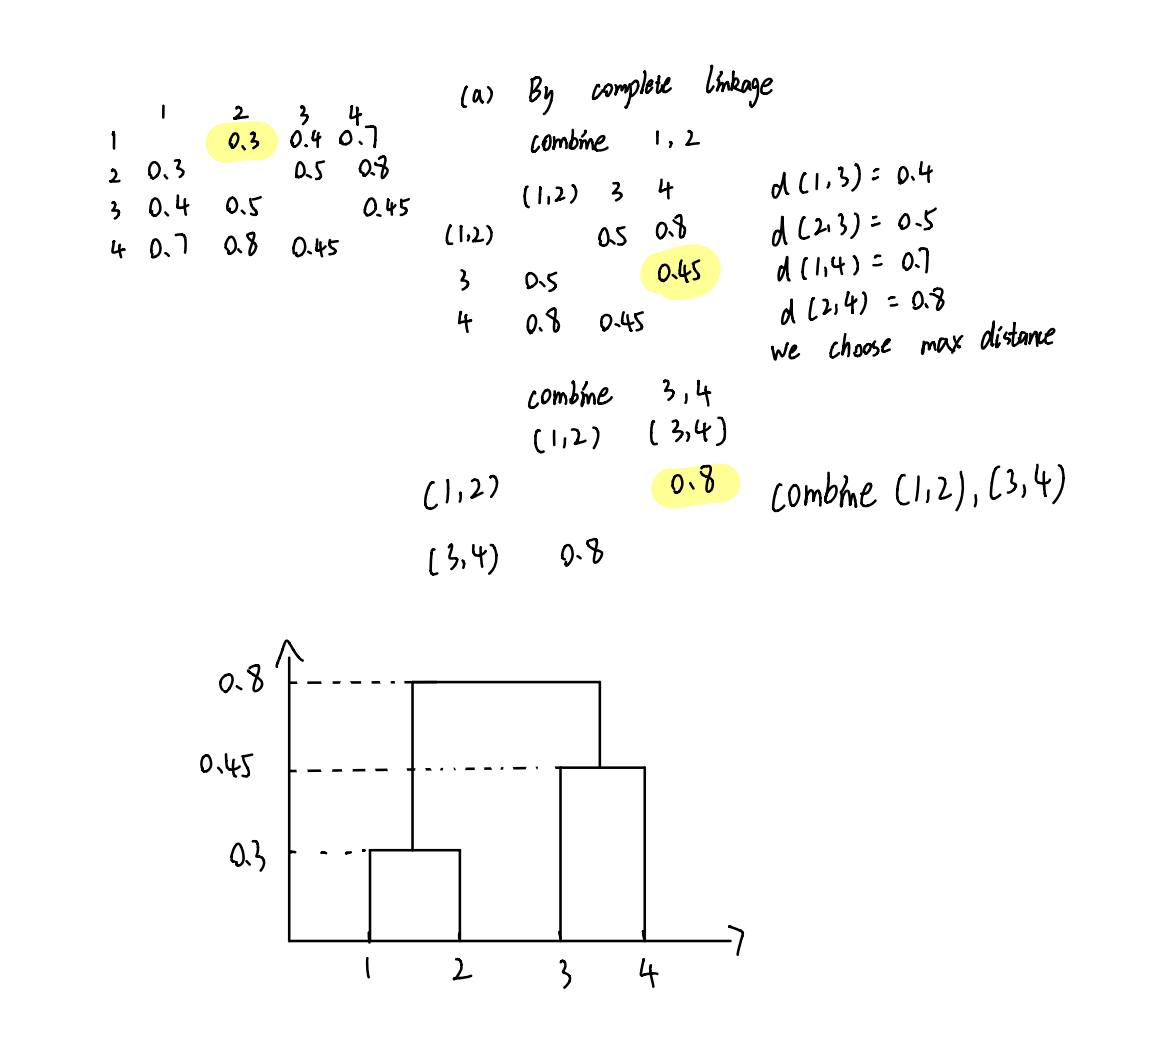

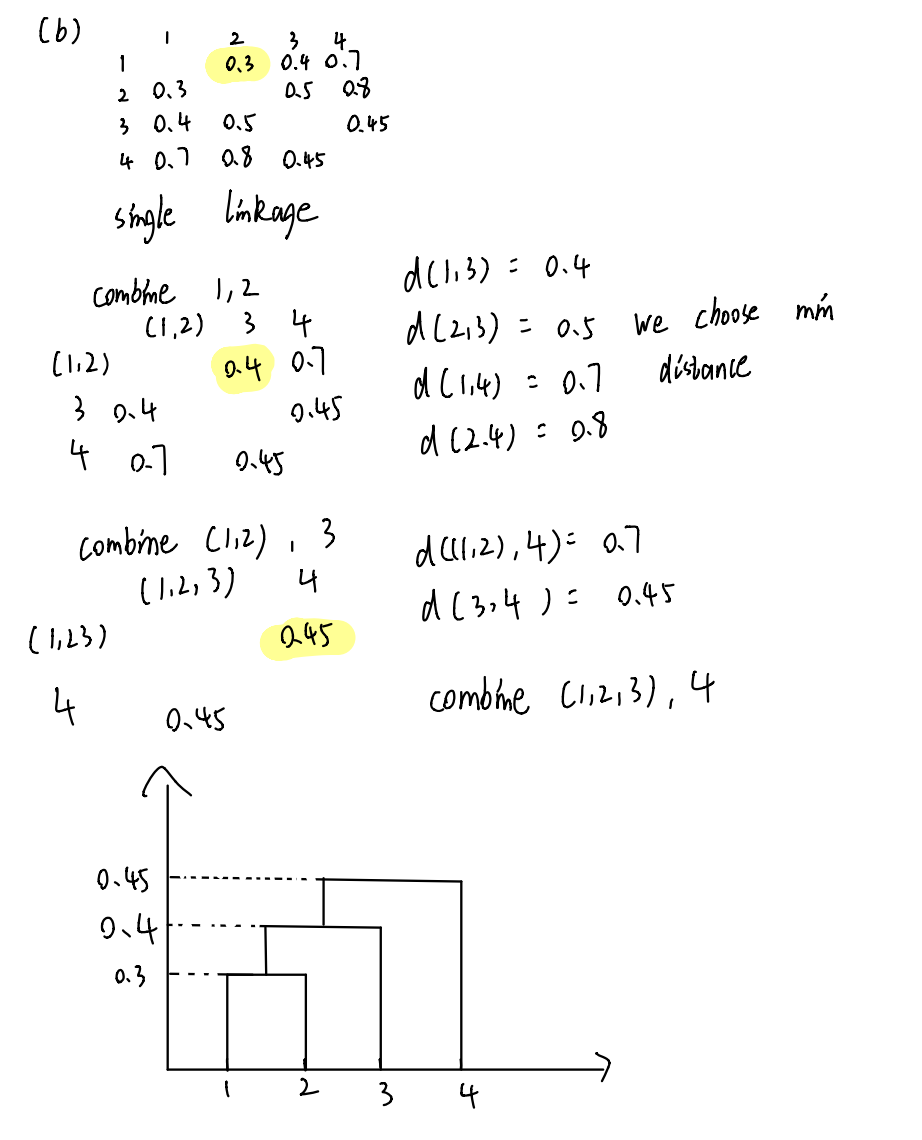

(c)

Observations 1 and 2 are in Cluster A

Observations 3 and 4 are in Cluster B

(d)

Observations 1, 2 and 3 are in Cluster A 

Observations 4 is in Cluster B.


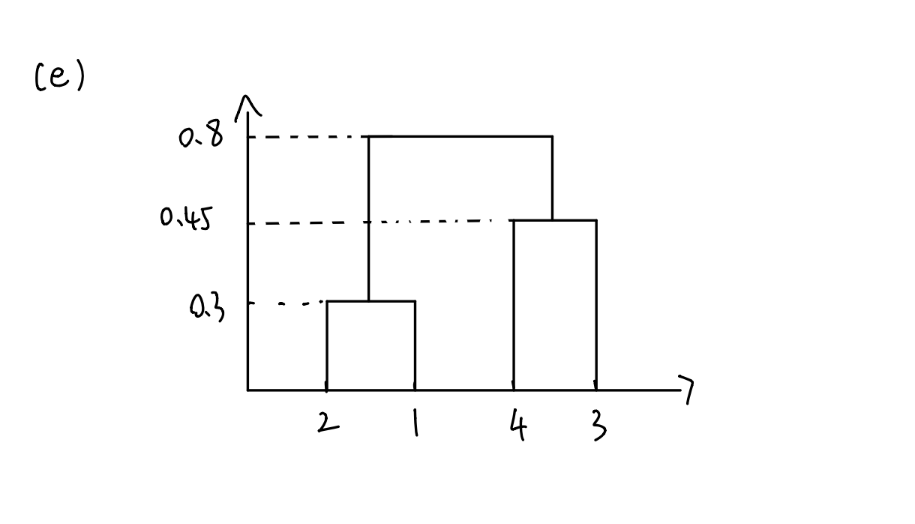